In [1]:
import pandas as pd

In [2]:
# Here we import the necessary functions from the bayesian_age_calculation module
# Make sure the bayesian_age_calulation.py is in the same directory as this script.
from bayesian_age_calculation import normalize_vector
from bayesian_age_calculation import plot_kde
from bayesian_age_calculation import plot_mcmc_simulation_results
from bayesian_age_calculation import plot_histogram
from bayesian_age_calculation import plot_eruption_and_saturation_age
from bayesian_age_calculation import calculate_bayesian_age

Unique units in the data: ['TestUnit1' 'TestUnit2']


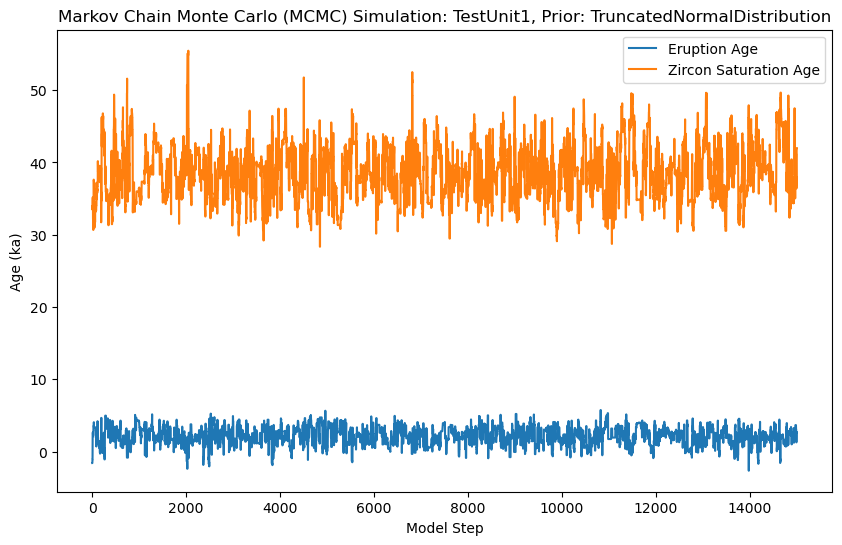

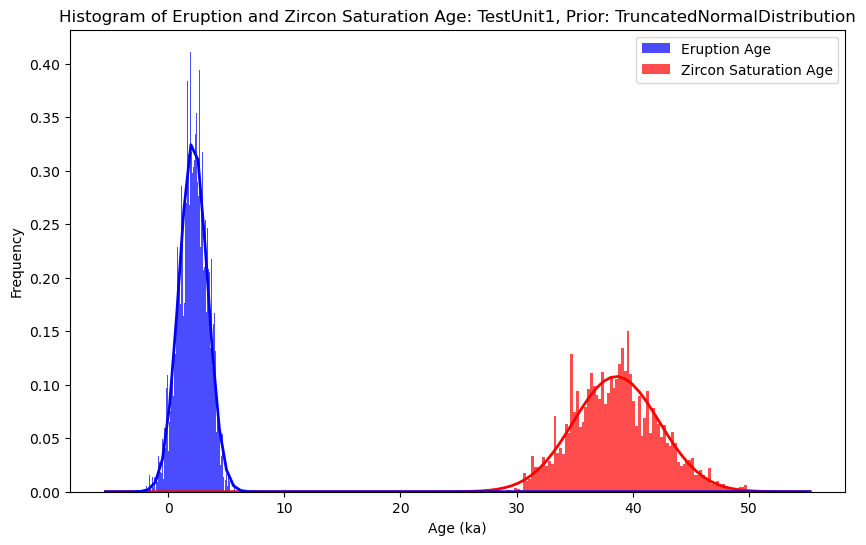

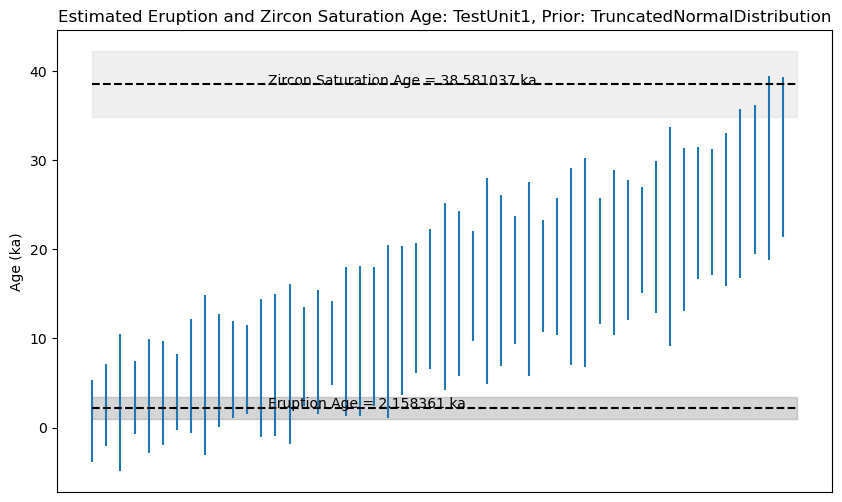

Bayesian age calculation for TestUnit1 with TruncatedNormalDistribution completed.


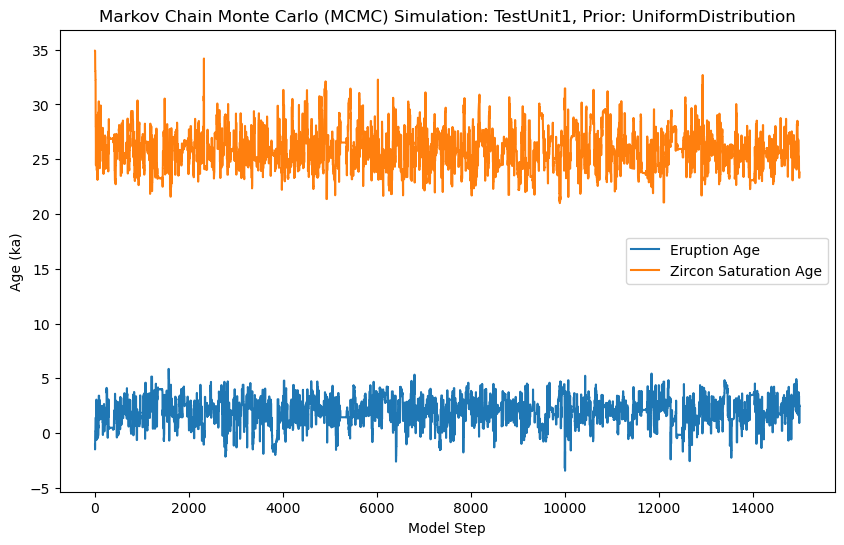

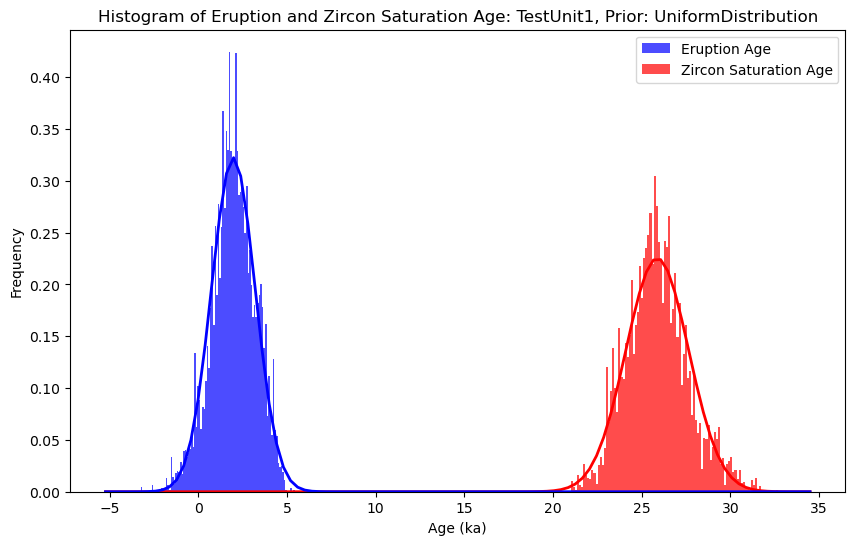

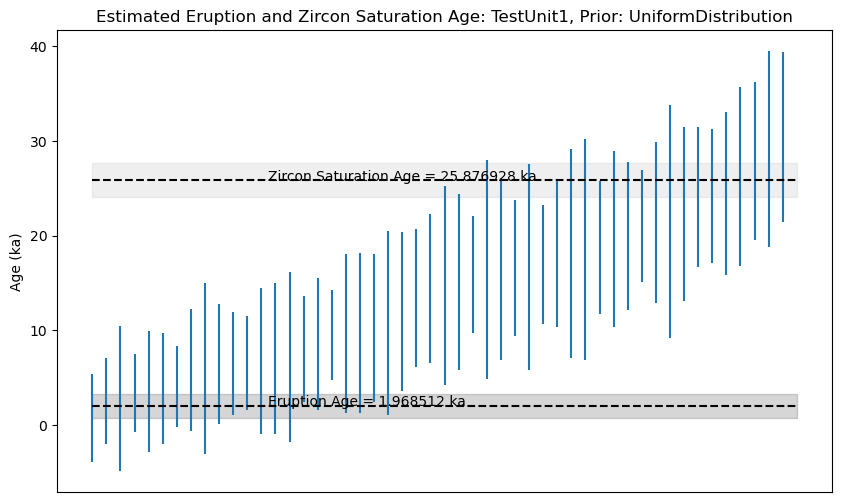

Bayesian age calculation for TestUnit1 with UniformDistribution completed.


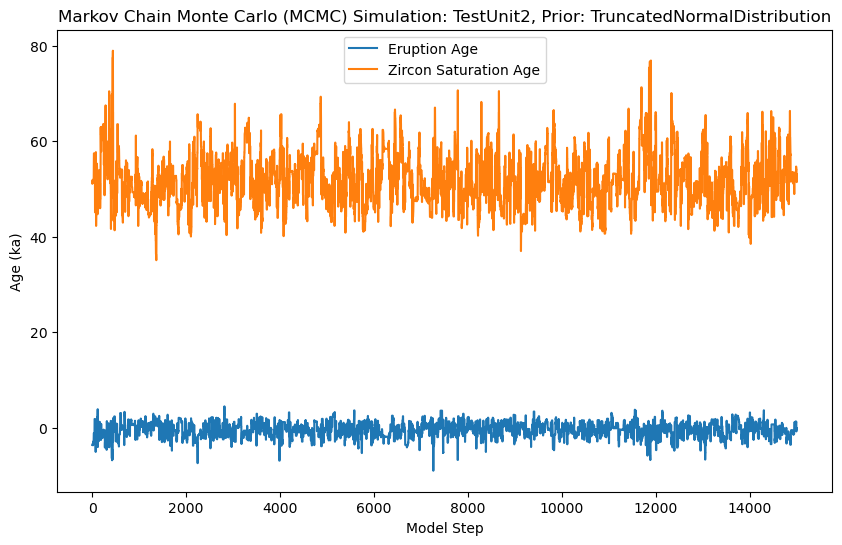

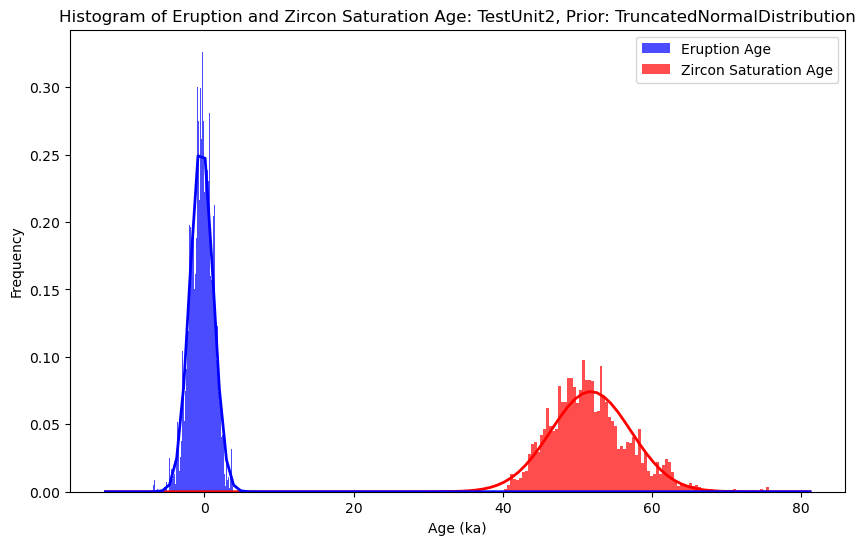

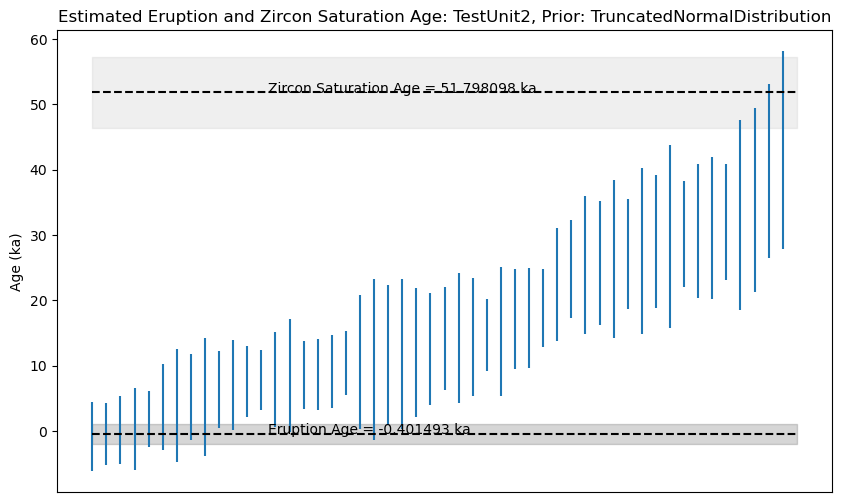

Bayesian age calculation for TestUnit2 with TruncatedNormalDistribution completed.


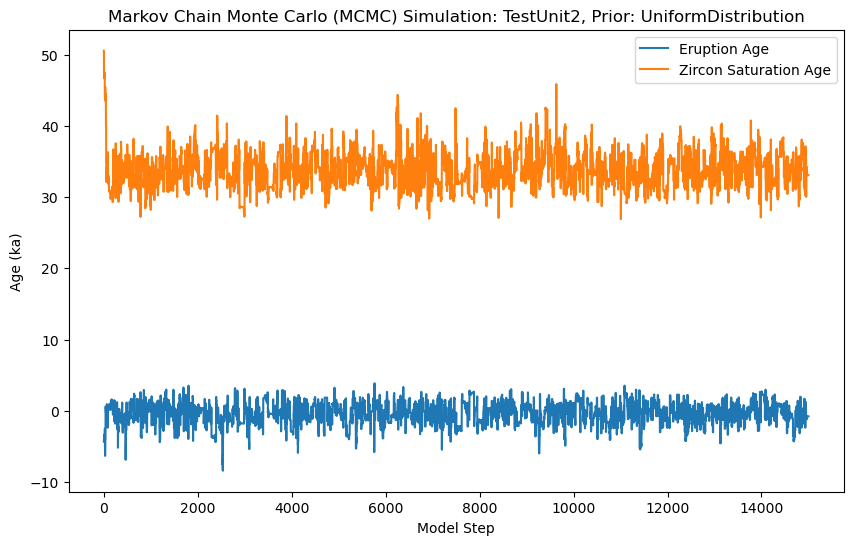

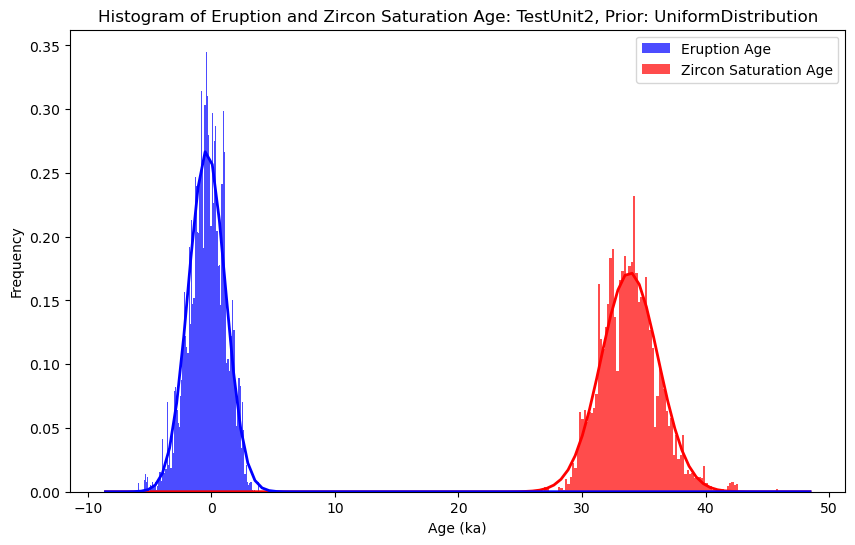

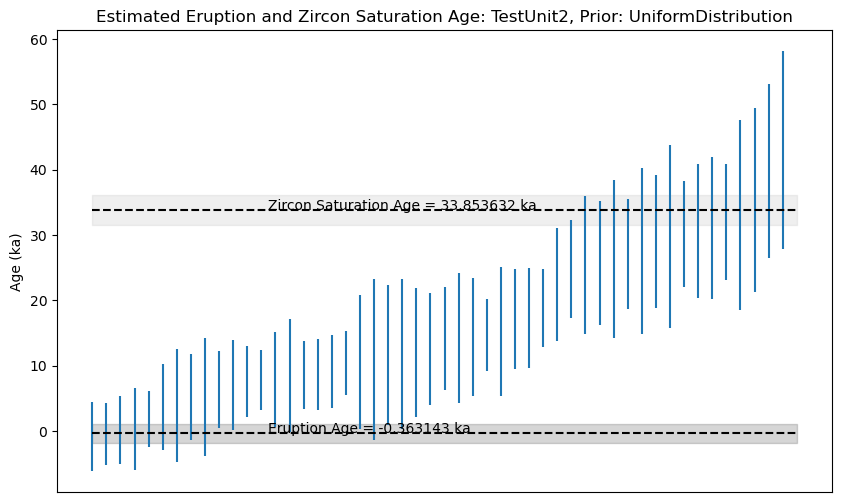

Bayesian age calculation for TestUnit2 with UniformDistribution completed.


In [3]:
# This script is used to calculate the Bayesian eruption age of zircon crystals based on their model age and 1 sigma uncertainty.
# Please change the directory and file names to your own data.
directory_data = '' # This is the directory where your data file is located. Make sure to include the trailing slash.
name_data_file = 'example_data' # This is the name of the data file without the .xlsx extension.

# Please change the column names to your own data.
# Ensure that your file includes a column named 'Unit', where all rows corresponding to a single sample share the same value.
col_model_age = 'model_age'
col_model_age_1sigma = 'model_age_1sigma'

######################################################################################################################################################################
data_zrc = pd.read_excel(f'{directory_data}{name_data_file}.xlsx')
unique_units = data_zrc['Unit'].unique()
print(f'Unique units in the data: {unique_units}')
for variable_name in unique_units:
    PriorDist = [                       # Specify here the prior distributions to be used for the Bayesian age calculation.
    #"HalfNormalDistribution", 
    #"MeltsTZircDistribution", 
    #"TriangularDistribution",
    "TruncatedNormalDistribution", 
    #"VolcanicZirconDistribution",
    #"VolcanicZirconLowXDistribution",
    #"NormalDistribution",
    #"TruncatedLowNormalDistribution",
    #"Bootstrapped",
    "UniformDistribution"]
    for i in PriorDist:
        calculate_bayesian_age(data_zrc,unit_of_interest=variable_name, n_chain=15000, dist= i, model_age=col_model_age, mean_sigma = col_model_age_1sigma,do_plot=True)
        print(f'Bayesian age calculation for {variable_name} with {i} completed.')
output_file = f'{directory_data}{name_data_file}_bayesian_results.xlsx'
data_zrc.to_excel(output_file, index=False)

In [4]:
# After the Bayesian age calculation, we summarize the results by dropping the model age and 1 sigma columns.
# If there are other columns with unique values for each sample, you can also drop them here.
data_zrc = pd.read_excel(f'{directory_data}{name_data_file}_bayesian_results.xlsx')
data_zrc_summary = data_zrc.drop([col_model_age,col_model_age_1sigma], axis=1)
data_zrc_summary = data_zrc_summary.drop_duplicates()
data_zrc_summary.to_excel(f'{directory_data}{name_data_file}_bayesian_results_summary.xlsx', index=False)